# Traveled speeds

The Quota for Exercise of Parliamentary activity says that meal expenses can be reimbursed just for the politician, excluding guests and assistants. Creating a feature with information of traveled speed from last meal can help us detect anomalies compared to other expenses.

* Learn how to calculate distance between two coordinates.
* Filter "Congressperson meal" expenses.
* Order by occurence.
* Merge `current-year.xz` datasets with `companies.xz`, so we have latitude/longitude for each expense.
* Remove expenses with less than 12 hours of distance between each other.


* Filter specific congressperson.

...

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def read_csv(name='last-year'):
    data = pd.read_csv('../data/2016-08-08-%s.xz' % name,
                       parse_dates=[16],
                       dtype={'document_id': np.str,
                              'congressperson_id': np.str,
                              'congressperson_document': np.str,
                              'term_id': np.str,
                              'cnpj_cpf': np.str,
                              'reimbursement_number': np.str})
    congresspeople = pd.read_excel('~/Downloads/deputado.xls')
    is_individual_document = data['congressperson_name'].isin(congresspeople['Nome Parlamentar'])
    is_meal_document = data['subquota_description'] == 'Congressperson meal'
    return data[is_individual_document & is_meal_document]

def document_url(record):
    return 'http://www.camara.gov.br/cota-parlamentar/documentos/publ/%s/%s/%s.pdf' % \
        (record['applicant_id'], record['year'], record['document_id'])


datasets = [read_csv(name)
            for name in ['current-year', 'last-year', 'previous-years']]
data = pd.concat(datasets)
del(datasets)
data['issue_date'] = pd.to_datetime(data['issue_date'])
data = data.sort_values('issue_date')

In [2]:
len(data['congressperson_name'].unique())

433

In [3]:
data.groupby('congressperson_name', as_index=False). \
    agg({'net_value': np.nansum}). \
    sort_values('net_value', ascending=False). \
    head(10)
# congressperson_list = data. \
#     drop_duplicates('applicant_id', keep='first')
# ranking = pd.merge(data,
#                    congressperson_list,
#                    how='left',
#                    on='applicant_id')
# ranking.head(10)

,congressperson_name,net_value
365,ROGÉRIO PENINHA MENDONÇA,172310.13
358,ROBERTO FREIRE,165139.98
151,FRANCISCO FLORIANO,127388.00
410,VANDERLEI MACRIS,119028.58
34,ANTONIO BULHÕES,104838.29
373,RUBENS BUENO,100651.47
428,ZECA DIRCEU,95324.03
394,TAKAYAMA,82240.71
77,CELSO MALDANER,76458.86
206,JOSÉ CARLOS ARAÚJO,75198.50


In [4]:
document = data.sample(random_state=0).iloc[0]
document

document_id                                                             5733819
congressperson_name                                        ADELMO CARNEIRO LEÃO
congressperson_id                                                        178890
congressperson_document                                                     221
term                                                                       2015
state                                                                        MG
party                                                                        PT
term_id                                                                      55
subquota_number                                                              13
subquota_description                                        Congressperson meal
subquota_group_id                                                             0
subquota_group_description                                                  NaN
supplier                      ASSOCIAÇÃO

In [5]:
print(document_url(document))

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2906/2015/5733819.pdf


In [6]:
# ID | speed_from_previous | speed_from_next
# ------------------------------------------
# B  | None                | 
# A  | 
# C  | 

In [7]:
import numpy as np

aggregation = data. \
    groupby(['congressperson_name', 'issue_date'])['net_value']. \
    agg([len, np.sum, np.nanmean]). \
    reset_index()
aggregation.sort_values(['nanmean', 'len'], ascending=[False, False])

,congressperson_name,issue_date,len,sum,nanmean
36838,JOÃO CASTELO,2015-11-10 00:00:00,1.0,3041.80,3041.800
36828,JOÃO CASTELO,2015-09-16 00:00:00,1.0,3003.64,3003.640
10860,CARLOS BEZERRA,2015-06-03 00:00:00,1.0,2395.80,2395.800
36850,JOÃO CASTELO,2016-06-03 00:00:00,1.0,2360.50,2360.500
36847,JOÃO CASTELO,2016-04-04 01:00:00,1.0,1944.00,1944.000
29434,IRAJÁ ABREU,2011-10-18 00:00:00,1.0,1940.52,1940.520
48665,MARQUINHO MENDES,2015-12-02 00:00:00,1.0,1887.60,1887.600
36841,JOÃO CASTELO,2016-02-01 00:00:00,1.0,1772.34,1772.340
25601,FÁBIO MITIDIERI,2015-06-10 00:00:00,1.0,1726.31,1726.310
29465,IRAJÁ ABREU,2012-05-26 00:00:00,1.0,1665.21,1665.210


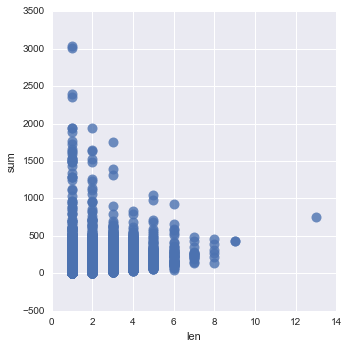

In [8]:
sns.lmplot('len', 'sum',
           data=aggregation,
           fit_reg=False,
           scatter_kws={"marker": "D", 
                        "s": 100})

In [9]:
aggregation[aggregation['len'] > 8]

,congressperson_name,issue_date,len,sum,nanmean
12642,CELSO MALDANER,2011-09-05,13.0,750.28,57.713846
43763,MAGDA MOFATTO,2015-03-15,9.0,435.63,48.403333
70038,TAKAYAMA,2015-08-14,9.0,437.08,48.564444


In [10]:
magda = data[(data['congressperson_name'] == 'MAGDA MOFATTO') & (data['issue_date'] == '2015-03-15')]
magda = magda[magda['document_id'].isin(['5645173', '5645177'])]
document_urls = magda. \
    apply(lambda row: pd.Series({'document_url': document_url(row)}), axis=1)

equal = pd.concat([magda, document_urls], axis=1)
equal

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state,party,term_id,subquota_number,subquota_description,...,month,year,installment,passenger,leg_of_the_trip,batch_number,reimbursement_number,reimbursement_value,applicant_id,document_url
223932,5645177,MAGDA MOFATTO,166402,431,2015.0,GO,PR,55,13,Congressperson meal,...,3,2015,0,NaN,NaN,1180192,4993,NaN,2437,http://www.camara.gov.br/cota-parlamentar/docu...
223933,5645173,MAGDA MOFATTO,166402,431,2015.0,GO,PR,55,13,Congressperson meal,...,3,2015,0,NaN,NaN,1179958,4993,NaN,2437,http://www.camara.gov.br/cota-parlamentar/docu...


In [11]:
record = equal.iloc[0]
print(record['document_url'])
record

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2437/2015/5645177.pdf


document_id                                                             5645177
congressperson_name                                               MAGDA MOFATTO
congressperson_id                                                        166402
congressperson_document                                                     431
term                                                                       2015
state                                                                        GO
party                                                                        PR
term_id                                                                      55
subquota_number                                                              13
subquota_description                                        Congressperson meal
subquota_group_id                                                             0
subquota_group_description                                                  NaN
supplier                          JACKSO

In [12]:
record = equal.iloc[1]
print(record['document_url'])
record

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2437/2015/5645173.pdf


document_id                                                             5645173
congressperson_name                                               MAGDA MOFATTO
congressperson_id                                                        166402
congressperson_document                                                     431
term                                                                       2015
state                                                                        GO
party                                                                        PR
term_id                                                                      55
subquota_number                                                              13
subquota_description                                        Congressperson meal
subquota_group_id                                                             0
subquota_group_description                                                  NaN
supplier                          JACKSO

## Add distance from last day

In [13]:
companies = pd.read_csv('../data/2016-09-03-companies.xz', low_memory=False)
companies['cnpj'] = companies['cnpj'].str.replace(r'[./-]', '')

In [14]:
list(companies.columns[:26]) + ['latitude', 'longitude']

['situation_date',
 'type',
 'name',
 'phone',
 'situation',
 'neighborhood',
 'address',
 'number',
 'zip_code',
 'city',
 'state',
 'opening',
 'legal_entity',
 'trade_name',
 'cnpj',
 'last_updated',
 'status',
 'additional_address_details',
 'email',
 'responsible_federative_entity',
 'situation_reason',
 'special_situation',
 'special_situation_date',
 'message',
 'main_activity_code',
 'main_activity',
 'latitude',
 'longitude']

In [15]:
companies = companies[list(companies.columns[:26]) + ['latitude', 'longitude']]

In [16]:
data_with_geo = pd.merge(data, companies,
                         how='left',
                         left_on='cnpj_cpf',
                         right_on='cnpj')
data_with_geo = data_with_geo[data_with_geo['cnpj'].notnull()]
data_with_geo.head()

,document_id,congressperson_name,congressperson_id,congressperson_document,term,state_x,party,term_id,subquota_number,subquota_description,...,email,responsible_federative_entity,situation_reason,special_situation,special_situation_date,message,main_activity_code,main_activity,latitude,longitude
0,1986899,JOSÉ ROCHA,74554,203,2015.0,BA,PR,55,13,Congressperson meal,...,NaN,NaN,NaN,NaN,NaN,NaN,56.11-2-01,Restaurantes e similares,-15.804453,-47.894918
1,1988231,VANDERLEI MACRIS,141553,394,2015.0,SP,PSDB,55,13,Congressperson meal,...,NaN,NaN,NaN,NaN,NaN,NaN,47.21-1-02,Padaria e confeitaria com predominância de rev...,-23.604546,-46.656918
4,2001261,PEPE VARGAS,141445,503,2015.0,RS,PT,55,13,Congressperson meal,...,NaN,NaN,NaN,NaN,NaN,NaN,56.11-2-01,Restaurantes e similares,-15.841430,-47.876751
5,2001266,SANDES JÚNIOR,74372,524,2015.0,GO,PP,55,13,Congressperson meal,...,NaN,NaN,NaN,NaN,NaN,NaN,56.11-2-01,Restaurantes e similares,-15.814051,-47.848019
6,1989599,FELIPE MAIA,141429,120,2015.0,RN,DEM,55,13,Congressperson meal,...,potiguar@camaroes.com.br,NaN,NaN,NaN,NaN,NaN,56.11-2-01,Restaurantes e similares,-5.811294,-35.206236


In [17]:
from geopy.distance import vincenty as distance
from IPython.display import display

x = data_with_geo.iloc[0]
display(x)
y = data_with_geo.iloc[20]
display(y)
distance(x[['latitude', 'longitude']],
         y[['latitude', 'longitude']])

document_id                                                              1986899
congressperson_name                                                   JOSÉ ROCHA
congressperson_id                                                          74554
congressperson_document                                                      203
term                                                                        2015
state_x                                                                       BA
party                                                                         PR
term_id                                                                       55
subquota_number                                                               13
subquota_description                                         Congressperson meal
subquota_group_id                                                              0
subquota_group_description                                                   NaN
supplier                    

document_id                                                    1988249
congressperson_name                                   VANDERLEI MACRIS
congressperson_id                                               141553
congressperson_document                                            394
term                                                              2015
state_x                                                             SP
party                                                             PSDB
term_id                                                             55
subquota_number                                                     13
subquota_description                               Congressperson meal
subquota_group_id                                                    0
subquota_group_description                                         NaN
supplier                             RESTAURANTE SANTA GERTRUDES LTDA.
cnpj_cpf                                                47904495000147
docume

Distance(870.3262768169413)

In [18]:
def coordinates_from_series(record):
    return record['latitude'], record['longitude']

coordinates = data_with_geo[['latitude', 'longitude']]. \
    apply(coordinates_from_series, axis=1)
data_with_geo['coordinates'] = coordinates

In [19]:
data_with_geo['coordinates'].head()

0    (-15.8044535, -47.8949176)
1    (-23.6045463, -46.6569184)
4    (-15.8414298, -47.8767513)
5    (-15.8140514, -47.8480186)
6     (-5.8112936, -35.2062356)
Name: coordinates, dtype: object

In [20]:
is_in_brazil = (data_with_geo['longitude'] < -34.7916667) & \
    (data_with_geo['latitude'] < 5.2722222) & \
    (data_with_geo['latitude'] > -33.742222) & \
    (data_with_geo['longitude'] > -73.992222)
data_with_geo = data_with_geo[is_in_brazil]

In [21]:
data_with_geo.head().iloc[0]

document_id                                                              1986899
congressperson_name                                                   JOSÉ ROCHA
congressperson_id                                                          74554
congressperson_document                                                      203
term                                                                        2015
state_x                                                                       BA
party                                                                         PR
term_id                                                                       55
subquota_number                                                               13
subquota_description                                         Congressperson meal
subquota_group_id                                                              0
subquota_group_description                                                   NaN
supplier                    

In [22]:
from itertools import tee

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def distances(x):
    distance_list = [distance(*coordinates_pair).km
                     for coordinates_pair in pairwise(x)]
    return np.nansum(distance_list)

agg_data = data_with_geo.loc[data_with_geo['latitude'].notnull(),
                             ['congressperson_name', 'issue_date', 'coordinates', 'net_value']]
agg_data = agg_data.groupby(['congressperson_name', 'issue_date'])
results = agg_data. \
    agg({'coordinates': distances,
         'congressperson_name': len,
         'net_value': np.sum}). \
    rename(columns={'coordinates': 'distance_traveled',
                    'congressperson_name': 'count'})#. \
#     sort_values('distance_traveled', ascending=False). \
#     reset_index()

In [23]:
results = results[results['distance_traveled'] > 0]. \
    sort_values(['count', 'net_value'], ascending=False). \
    reset_index()

In [24]:
results.head()

,congressperson_name,issue_date,distance_traveled,net_value,count
0,CELSO MALDANER,2011-09-05,2685.922852,750.28,13
1,MAGDA MOFATTO,2015-03-15,460.259677,435.63,9
2,TAKAYAMA,2014-06-20,1194.882582,462.82,8
3,VICENTINHO,2013-06-11,5.939521,309.95,8
4,JORGE SOLLA,2015-08-07,35.953409,267.43,8


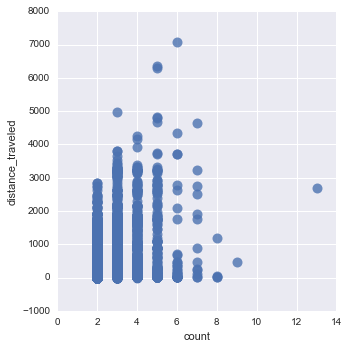

In [25]:
sns.lmplot('count', 'distance_traveled',
           data=results,
           fit_reg=False,
           scatter_kws={"marker": "D", 
                        "s": 100})

In [26]:
results[results['net_value'] > 800]['congressperson_name'].unique()

array(['ROGÉRIO PENINHA MENDONÇA', 'JOÃO CASTELO', 'MAJOR OLIMPIO',
       'ASSIS CARVALHO', 'IRAJÁ ABREU', 'ARNALDO JORDY', 'JOSÉ NUNES',
       'MARA GABRILLI', 'PASTOR EURICO', 'EDINHO BEZ'], dtype=object)

In [27]:
predicate = (data_with_geo['congressperson_name'] == 'JOÃO CASTELO') & \
    (data_with_geo['issue_date'] == '2015-05-06')
records = data_with_geo[predicate]
len(records)

3

In [28]:
x = records.iloc[0]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/1299/2015/5682228.pdf


document_id                                                                5682228
congressperson_name                                                   JOÃO CASTELO
congressperson_id                                                            74445
congressperson_document                                                         75
term                                                                          2015
state_x                                                                         MA
party                                                                         PSDB
term_id                                                                         55
subquota_number                                                                 13
subquota_description                                           Congressperson meal
subquota_group_id                                                                0
subquota_group_description                                                     NaN
supp

In [29]:
x = records.iloc[1]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/1299/2015/5675287.pdf


document_id                                                                5675287
congressperson_name                                                   JOÃO CASTELO
congressperson_id                                                            74445
congressperson_document                                                         75
term                                                                          2015
state_x                                                                         MA
party                                                                         PSDB
term_id                                                                         55
subquota_number                                                                 13
subquota_description                                           Congressperson meal
subquota_group_id                                                                0
subquota_group_description                                                     NaN
supp

In [30]:
x = records.iloc[2]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/1299/2015/5676786.pdf


document_id                                                    5676786
congressperson_name                                       JOÃO CASTELO
congressperson_id                                                74445
congressperson_document                                             75
term                                                              2015
state_x                                                             MA
party                                                             PSDB
term_id                                                             55
subquota_number                                                     13
subquota_description                               Congressperson meal
subquota_group_id                                                    0
subquota_group_description                                         NaN
supplier                           PAULO OCTAVIO HOTEIS E TURISMO LTDA
cnpj_cpf                                                26418749000147
docume

In [31]:
predicate = (data_with_geo['congressperson_name'] == 'MAJOR OLIMPIO') & \
    (data_with_geo['issue_date'] == '2015-11-09')
records = data_with_geo[predicate]
len(records)

3

In [32]:
x = records.iloc[0]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2935/2015/5840725.pdf


document_id                                                                5840725
congressperson_name                                                  MAJOR OLIMPIO
congressperson_id                                                           178826
congressperson_document                                                        368
term                                                                          2015
state_x                                                                         SP
party                                                                           SD
term_id                                                                         55
subquota_number                                                                 13
subquota_description                                           Congressperson meal
subquota_group_id                                                                0
subquota_group_description                                                     NaN
supp

In [33]:
x = records.iloc[1]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2935/2015/5847853.pdf


document_id                                                    5847853
congressperson_name                                      MAJOR OLIMPIO
congressperson_id                                               178826
congressperson_document                                            368
term                                                              2015
state_x                                                             SP
party                                                               SD
term_id                                                             55
subquota_number                                                     13
subquota_description                               Congressperson meal
subquota_group_id                                                    0
subquota_group_description                                         NaN
supplier                                GOLDEN TULIP BRASILIA ALVORADA
cnpj_cpf                                                09109567001732
docume

In [34]:
x = records.iloc[2]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2935/2015/5841002.pdf


document_id                                                    5841002
congressperson_name                                      MAJOR OLIMPIO
congressperson_id                                               178826
congressperson_document                                            368
term                                                              2015
state_x                                                             SP
party                                                               SD
term_id                                                             55
subquota_number                                                     13
subquota_description                               Congressperson meal
subquota_group_id                                                    0
subquota_group_description                                         NaN
supplier                             BIER FASS RESTAURANTE MUSEU LTDA.
cnpj_cpf                                                05033214000188
docume

In [35]:
d = read_csv()
d[d['document_id'] == '5847853'].iloc[0]

document_id                                          5847853
congressperson_name                            MAJOR OLIMPIO
congressperson_id                                     178826
congressperson_document                                  368
term                                                    2015
state                                                     SP
party                                                     SD
term_id                                                   55
subquota_number                                           13
subquota_description                     Congressperson meal
subquota_group_id                                          0
subquota_group_description                               NaN
supplier                      GOLDEN TULIP BRASILIA ALVORADA
cnpj_cpf                                      09109567001732
document_number                                       248785
document_type                                              0
issue_date              

In [36]:
predicate = (data_with_geo['congressperson_name'] == 'JOSÉ NUNES') & \
    (data_with_geo['issue_date'] == '2015-06-09')
records = data_with_geo[predicate]
len(records)

2

In [37]:
x = records.iloc[0]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2348/2015/5711897.pdf


document_id                                                                5711897
congressperson_name                                                     JOSÉ NUNES
congressperson_id                                                           160619
congressperson_document                                                        201
term                                                                          2015
state_x                                                                         BA
party                                                                          PSD
term_id                                                                         55
subquota_number                                                                 13
subquota_description                                           Congressperson meal
subquota_group_id                                                                0
subquota_group_description                                                     NaN
supp

In [38]:
x = records.iloc[1]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2348/2015/5725072.pdf


document_id                                                    5725072
congressperson_name                                         JOSÉ NUNES
congressperson_id                                               160619
congressperson_document                                            201
term                                                              2015
state_x                                                             BA
party                                                              PSD
term_id                                                             55
subquota_number                                                     13
subquota_description                               Congressperson meal
subquota_group_id                                                    0
subquota_group_description                                         NaN
supplier                                GOLDEN TULIP BRASILIA ALVORADA
cnpj_cpf                                                09109567001732
docume

In [39]:
predicate = (data_with_geo['congressperson_name'] == 'JOSÉ NUNES') & \
    (data_with_geo['issue_date'] == '2015-09-03')
records = data_with_geo[predicate]
len(records)

2

In [40]:
x = records.iloc[0]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2348/2015/5786890.pdf


document_id                                                    5786890
congressperson_name                                         JOSÉ NUNES
congressperson_id                                               160619
congressperson_document                                            201
term                                                              2015
state_x                                                             BA
party                                                              PSD
term_id                                                             55
subquota_number                                                     13
subquota_description                               Congressperson meal
subquota_group_id                                                    0
subquota_group_description                                         NaN
supplier                                GOLDEN TULIP BRASILIA ALVORADA
cnpj_cpf                                                09109567001732
docume

In [41]:
x = records.iloc[1]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2348/2015/5800014.pdf


document_id                                                         5800014
congressperson_name                                              JOSÉ NUNES
congressperson_id                                                    160619
congressperson_document                                                 201
term                                                                   2015
state_x                                                                  BA
party                                                                   PSD
term_id                                                                  55
subquota_number                                                          13
subquota_description                                    Congressperson meal
subquota_group_id                                                         0
subquota_group_description                                              NaN
supplier                                   PONTO CERTO COM. DE CEREAIS LTDA
cnpj_cpf    

In [42]:
predicate = (data_with_geo['congressperson_name'] == 'JOSÉ NUNES') & \
    (data_with_geo['issue_date'] == '2015-10-13')
records = data_with_geo[predicate]
len(records)

2

In [43]:
x = records.iloc[0]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2348/2015/5825131.pdf


document_id                                                         5825131
congressperson_name                                              JOSÉ NUNES
congressperson_id                                                    160619
congressperson_document                                                 201
term                                                                   2015
state_x                                                                  BA
party                                                                   PSD
term_id                                                                  55
subquota_number                                                          13
subquota_description                                    Congressperson meal
subquota_group_id                                                         0
subquota_group_description                                              NaN
supplier                                   PONTO CERTO COM. DE CEREAIS LTDA
cnpj_cpf    

In [44]:
x = records.iloc[1]
print(document_url(x))
x

http://www.camara.gov.br/cota-parlamentar/documentos/publ/2348/2015/5864382.pdf


document_id                                                    5864382
congressperson_name                                         JOSÉ NUNES
congressperson_id                                               160619
congressperson_document                                            201
term                                                              2015
state_x                                                             BA
party                                                              PSD
term_id                                                             55
subquota_number                                                     13
subquota_description                               Congressperson meal
subquota_group_id                                                    0
subquota_group_description                                         NaN
supplier                                GOLDEN TULIP BRASILIA ALVORADA
cnpj_cpf                                                09109567001732
docume

In [45]:
aggregation[aggregation['len'] > 12]

,congressperson_name,issue_date,len,sum,nanmean
12642,CELSO MALDANER,2011-09-05,13.0,750.28,57.713846


In [46]:
predicate = (data_with_geo['congressperson_name'] == 'CELSO MALDANER') & \
    (data_with_geo['issue_date'] == '2011-09-05')
records = data_with_geo[predicate]
len(records)

13

In [47]:
records['net_value']

10384    69.00
10385    70.00
10387    60.00
10388    58.00
10390    65.00
10392    23.00
10394    61.00
10395    40.00
10397    63.00
10400    68.00
10413    87.78
10415    22.50
10421    63.00
Name: net_value, dtype: float64

In [48]:
records.apply(lambda row: print(('R$%i' % row['net_value']), document_url(row)),
              axis=1)

R$69 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2156131.pdf
R$70 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2154558.pdf
R$60 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2171763.pdf
R$58 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2173914.pdf
R$65 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2162916.pdf
R$23 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2186747.pdf
R$61 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2169264.pdf
R$40 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2177925.pdf
R$63 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2166537.pdf
R$68 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2159555.pdf
R$87 http://www.camara.gov.br/cota-parlamentar/documentos/publ/1798/2011/2153141.pdf
R$22 http://www.camara.gov.br/cota-parlamentar/documentos/publ/17

10384    None
10385    None
10387    None
10388    None
10390    None
10392    None
10394    None
10395    None
10397    None
10400    None
10413    None
10415    None
10421    None
dtype: object

In [49]:
records.iloc[0]

document_id                                                       2156131
congressperson_name                                        CELSO MALDANER
congressperson_id                                                  141405
congressperson_document                                               472
term                                                                 2015
state_x                                                                SC
party                                                                PMDB
term_id                                                                55
subquota_number                                                        13
subquota_description                                  Congressperson meal
subquota_group_id                                                       0
subquota_group_description                                            NaN
supplier                                    NATURETTO RESTAURANTE NATURAL
cnpj_cpf                              

In [50]:
records['document_id'].values

array(['2156131', '2154558', '2171763', '2173914', '2162916', '2186747',
       '2169264', '2177925', '2166537', '2159555', '2153141', '2153924',
       '2168614'], dtype=object)

In [56]:
data['congressperson_name'].unique()

array(['JOSÉ ROCHA', 'VANDERLEI MACRIS', 'VINICIUS CARVALHO',
       'PEPE VARGAS', 'SANDES JÚNIOR', 'FELIPE MAIA', 'MARIA HELENA',
       'LUIS CARLOS HEINZE', 'CELSO MALDANER', 'ELCIONE BARBALHO',
       'SIMÃO SESSIM', 'RENATO MOLLING', 'INDIO DA COSTA',
       'EDUARDO BARBOSA', 'BETO MANSUR', 'POMPEO DE MATTOS',
       'VALDIR COLATTO', 'TAKAYAMA', 'RODRIGO DE CASTRO',
       'ANTONIO BULHÕES', 'JOÃO CARLOS BACELAR', 'HENRIQUE FONTANA',
       'JOSÉ CARLOS ARAÚJO', 'AELTON FREITAS', 'EDINHO BEZ',
       'ROBERTO BALESTRA', 'CARLOS EDUARDO CADOCA', 'LINCOLN PORTELA',
       'NELSON PELLEGRINO', 'MAURO MARIANI', 'MANOEL JUNIOR',
       'CELSO RUSSOMANNO', 'OTAVIO LEITE', 'ADEMIR CAMILO', 'MAIA FILHO',
       'MARCOS MONTES', 'VALTENIR PEREIRA', 'ROBERTO BRITTO',
       'JORGE TADEU MUDALEN', 'LEONARDO QUINTÃO', 'EFRAIM FILHO',
       'ARLINDO CHINAGLIA', 'ALICE PORTUGAL', 'ROBERTO ALVES',
       'MÁRCIO MARINHO', 'JOÃO CAMPOS', 'NELSON MEURER', 'JOSÉ MENTOR',
       'VICENTINHO', 'C